## Data Visualizations & Exploratory Analysis

To better understand the structure and behavior of discounted food products, we conducted exploratory data analysis using real-time data from the Salling Group API. These visualizations provided early insights that shaped our recommendation strategy.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load dataset
data = pd.read_csv("food_waste_ingredients.csv")


57 out of 310 discounted items lacked English category names. This missing data limits our ability to categorize products accurately, reducing the effectiveness of our recommendation system and making it harder to match these items to relevant recipes and ultimately undermining efforts to reduce food waste.

In [17]:
print("\nMissing values in 'final_category':")
print(data['final_category'].isnull().sum())


# Drop duplicates
data = data.drop_duplicates()
print(f"\nShape after dropping duplicates: {data.shape}")



Missing values in 'final_category':
57

Shape after dropping duplicates: (310, 18)


### Distribution of Discount Amounts
 The histogram of discount amounts shows that most discounted products have small price reductions, typically under 10 DKK. Only a few products receive much larger discounts. This pattern indicates that while high-value discounts exist, they are relatively rare. Most items are reduced by just a few DKK.

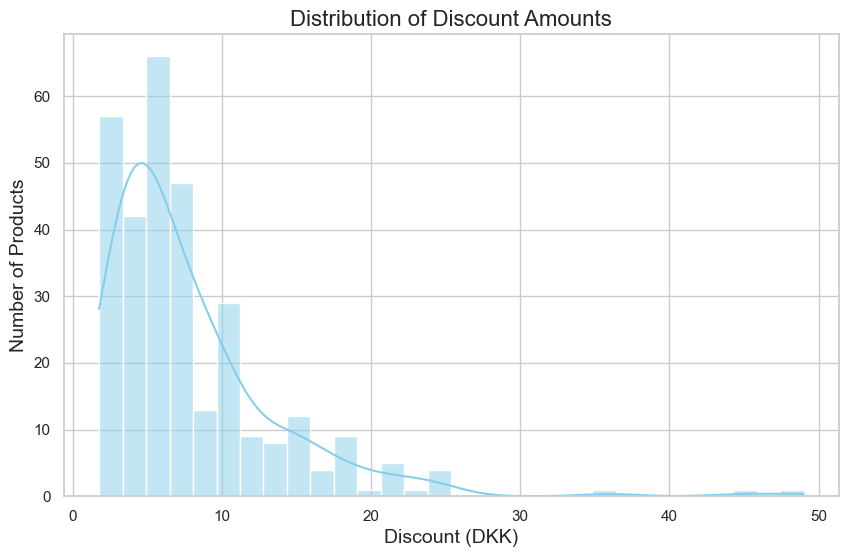

In [3]:
# Plot Discount Distribution

plt.figure(figsize=(10,6))
sns.histplot(data['discount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Discount Amounts', fontsize=16)
plt.xlabel('Discount (DKK)', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.grid(True)
plt.show()


### Average Discount per Broad Category
By aggregating discount values by high-level product categories, we observed that:

Meat and Fish has the highest average discount, likely due to perishability and high initial price.

Dairy and Cold Storage follows closely, again pointing to short shelf-life.

Beverages and Bread and Cakes showed consistently lower average markdowns.

This suggests that not all product types are discounted equally, which is valuable when designing product recommendations based on price sensitivity or urgency.

C:\Users\Notandi\AppData\Local\Temp\ipykernel_26132\2836516187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_by_broad.values, y=avg_discount_by_broad.index, palette="viridis")


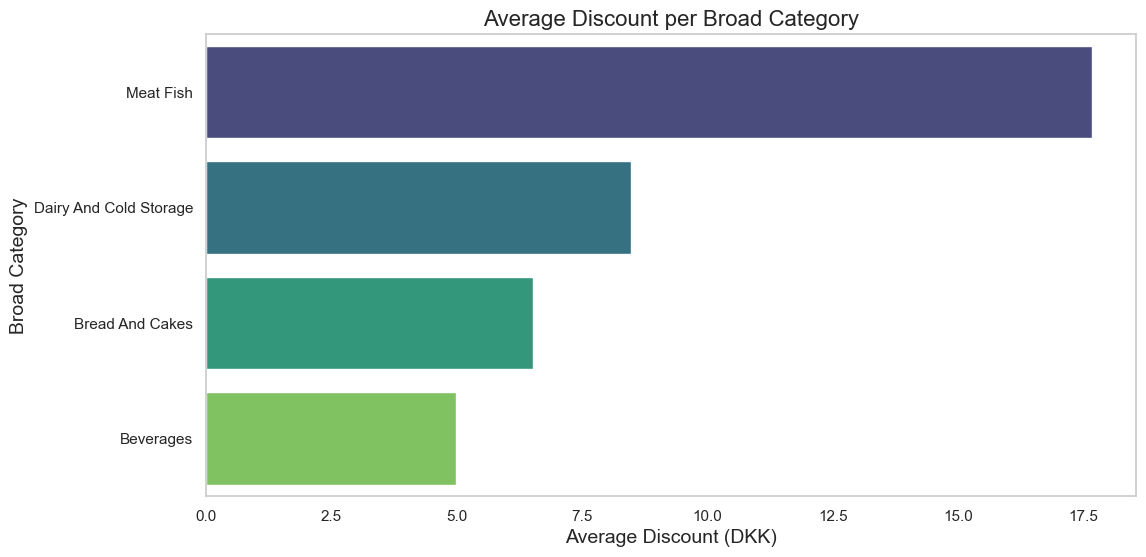

In [4]:
# Calculate average discount per broad_category
avg_discount_by_broad = data.groupby('category1')['discount'].mean().sort_values(ascending=False)

# Plot average discount
plt.figure(figsize=(12,6))
sns.barplot(x=avg_discount_by_broad.values, y=avg_discount_by_broad.index, palette="viridis")
plt.title('Average Discount per Broad Category', fontsize=16)
plt.xlabel('Average Discount (DKK)', fontsize=14)
plt.ylabel('Broad Category', fontsize=14)
plt.grid(axis='x')
plt.show()


### Top Categories by Product Count
When examining the most common broad categories among discounted items, we found:

Dairy and Cold Storage is by far the most represented category.

Bread and Cakes, Beverages, and Meat and Fish follow but with significantly lower counts.

This distribution highlights where most food waste activity occurs. The imbalance motivated us to treat category-specific recommendations differently, as some product types offer more alternatives and data than others.

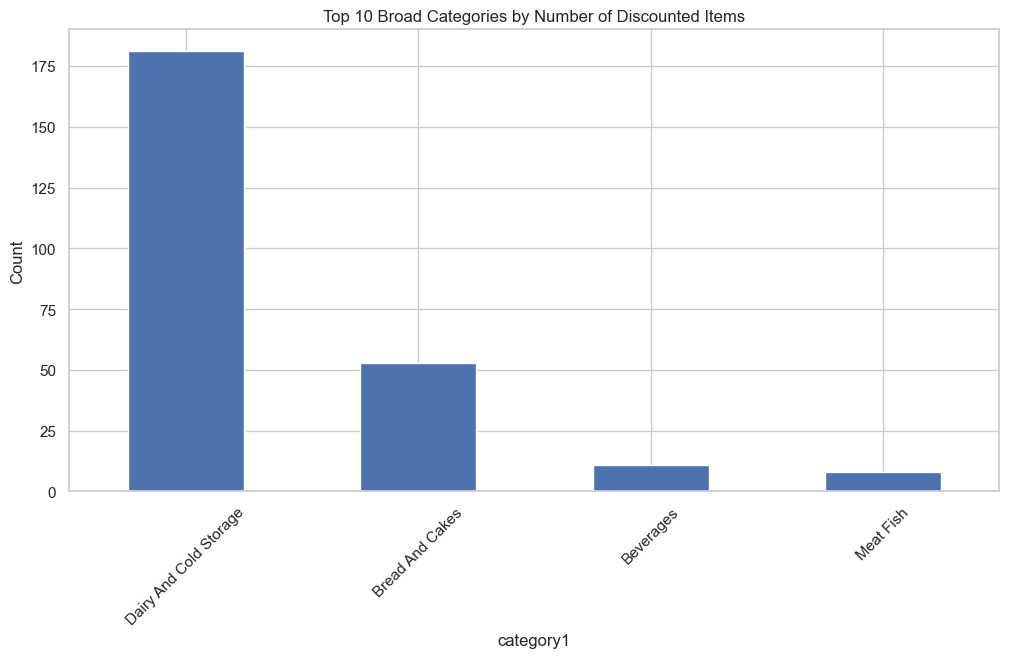

In [12]:
top_categories = data['category1'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_categories.plot(kind='bar')
plt.title('Top 10 Broad Categories by Number of Discounted Items')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
